# CMS plotting recommendations and tools tutorial

## Recommendations

A standard format style for CMS plots has been approved by the PubComm Steering Board. The primary goal is to display the CMS name in a visible way, so that it appears at first glance, and to present the integrated luminosity and center-of-mass energy is a simple, compact manner. The label "Preliminary" should be removed from the figures in the paper draft that goes to Collaboration Wide Review, so that the figures appear as intended for submission to a journal; it should be kept in the PAS version, as all results remain "preliminary" until the paper is submitted for publication. All figures showing data results should give the center-of-mass energy and the integrated luminosity corresponding to the results being presented.

In [4]:
!pip install cmsstyle

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install mplhep
!pip install hist
!pip install uproot

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.4/350.4 kB 1.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.9/787.9 kB 2.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.1 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 635.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 707.1/707.1 kB 5.6 MB/s eta 0:00:0000:01


### CMS Label Position
Effectively two positions are allowed - "in-frame" and "out-of-frame", unless particularly necessary otherwise.

<img src="images/ex_labelin.png" width="300"/>
<img src="images/ex_labelout.png" width="300"/>

In [2]:
### In-frame
hep.cms.label("Preliminary", loc=2, ax=ax)

CMS.SetExtraText("Simulation Preliminary")
CMS.SetLumi("")
canv = CMS.cmsCanvas('', 0, 1, 0, 1, '', '', square = CMS.kSquare, extraSpace=0.01, iPos=11)

### Out-of-frame
hep.cms.label("Preliminary", loc=0, ax=ax)

CMS.SetExtraText("Simulation Preliminary")
CMS.SetLumi("")
canv = CMS.cmsCanvas('', 0, 1, 0, 1, '', '', square = CMS.kSquare, extraSpace=0.01, iPos=0)

NameError: name 'hep' is not defined

### Labeling Guidelines

Should you choose to reimplement the labeling yourself, the following
guidelines should be observed.

- **CMS** is shown in bold, while the secondary label is shown in italics.
- The font size of the **CMS** label should be 1.3 times the size of the secondary label.
- For the in-frame option the CMS label should be located the same distance from
  both axes, with a sufficient gap from the tick marks. The secondary label can be included either below or next to the **CMS** text, but should align with it in both cases.
- For the out-of-frame option, the CMS label should be aligned with the y-axis
  edge. If included the Simulation/Preliminary/etc… labels should be bottom
  aligned with the primary CMS label.

### CMS Label Requirements

| Purpose                       | Has/Uses Data (Incl. corrected MC)         |  Simulation Only  |
| ----------------------------- | ------------------------------------ | ----------------  |
| PAPER                         | **CMS**                              | **CMS** *Simulation* |
| PAPER (supplementary)         | **CMS** *Supplementary*              | **CMS** *Simulation Supplementary* |
| PAS                         | **CMS** *Preliminary*                | **CMS** *Simulation Preliminary* |
| PAS (supplementary)         | **CMS** *Preliminary*                | **CMS** *Simulation Preliminary* |
| Thesis Endorsement Work &dagger;     | **CMS** *Work-in-Progress*              | **CMS** *Simulation Work-in-Progress* |
| Other Non-public Work &dagger;       | **CMS** *Private Work*              | **CMS** *Simulation Private Work* |

&dagger; - Use for internal purposes and student presentations at national conferences. Cannot be included in proceedings. For full rules consult [TWiki](https://twiki.cern.ch/twiki/bin/view/CMS/PhysicsApprovals#Student_presentations_of_unappro).

### Scientific Notation

If scientific notation is being used it is advisable to use the in-frame
labelling to avoid conflict

<img src="images/ex_sci1.png" width="300"/>
<img src="images/ex_sci2.png" width="300"/>

However, if necessary the position of the multiplier can be shifted

In [ ]:
# Scientific notation
ax.ticklabel_format(style="sci", scilimits=(-3, 3), useMathText=True)
# Shift multiplier position out
ax.get_yaxis().get_offset_text().set_position((-0.085, 1.05))

# Scientific notation
hdf = CMS.GetcmsCanvasHist(canv)
hdf.GetYaxis().SetMaxDigits(2)
# Shift multiplier position
ROOT.TGaxis.SetExponentOffset(-0.10, 0.01, "Y")

### Labels and Colorbars

Finally, when producing plots with colorbars, any potential label on top of the
plot should be aligned to the edge of the axis, not crossing over to to the
colorbar. Further the colorbar should have the same height at the primary axis.

<img src="images/ex_cbar.png" width="300"/>

### Font
The official guidelines specify Helvetica, or its open-source clone called TeX Gyre Heros, as the CMS font of choice.

### Color schemes
The choice of a color scheme is important for three reasons.

- Our results need to be easily understandable and interpretable.
- Colorblindness and journal conversions to grayscale can reduce their acessibility.
- Our results should be aesthetically pleasing

Following a D&I organized contest and vote, color-vision-deficiency-friendly
palettes have been selected and included as defaults into `cmsstyle` and
`mplhep` packages.

Data should be always shown in black. Basic color recommendations with examples
are found below, while more information is available at the [end of this
section](colors.md#more-information).

- Categorical Data (e.g. 1D Stackplots): Use the color scheme suggested by M. Petroff in
[arXiv:2107.02270v2](https://arxiv.org/pdf/2107.02270.pdf) and available on
[GitHub](https://github.com/mpetroff/accessible-color-cycles) (MIT License).
    - Specifically you should use the 6-color scheme:
        ```
        ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]
        ```
    - or if more colors are needed the 10-color scheme:
        ```
        ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"]
        ```
- Sequential Data (e.g. 2D Heatmaps, Levels...): use the popular `"viridis"` colormap, which should be available in most plotting
libraries by default.


## Tools to produce official CMS plots

To produce figures, use the two tools we are going to describe in the following. We strongly recommend that authors gather (in GitLab) all the files (macros, dot-C files or canvas files) necessary to reproduce all the figures in a paper.

### ROOT-world: `cmsstyle`
Recently introduced pip-installable PyROOT-based package
```bash
pip install cmsstyle
```

In [3]:
import ROOT as r
import cmsstyle as CMS

Welcome to JupyROOT 6.27/01


In [13]:
# File reading 
f = r.TFile.Open('test_file.root')
th1_names = [k.GetName() for k in f.GetListOfKeys() if k.GetName().startswith("h1d_")]
th1s = [f.Get(sample) for sample in th1_names]

# Styling
CMS.SetExtraText("Simulation")
iPos = 0
canv_name = 'hist1d_root'
CMS.SetLumi("")
CMS.SetEnergy("13")
CMS.ResetAdditionalInfo()

# Plotting
stack = r.THStack("stack", "Stacked")
canv = CMS.cmsCanvas(canv_name,0,10,1e-3,4300,"X","",square=CMS.kSquare,extraSpace=0.01,iPos=iPos)
leg = CMS.cmsLeg(0.81, 0.89 - 0.05 * 7, 0.99, 0.89, textSize=0.04)

# Put samples in a dict {sample: th1} and draw
hist_dict = dict(zip([name.split("_")[-1] for name in th1_names], th1s))
CMS.cmsDrawStack(stack, leg, hist_dict)

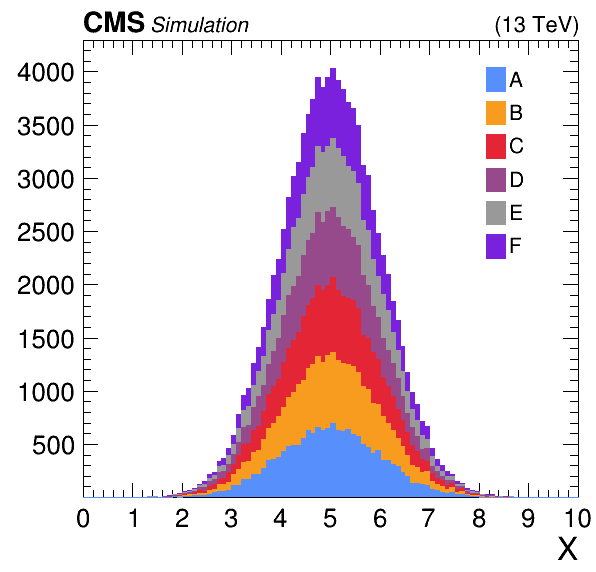

In [14]:
canv.Draw()

In [15]:
iPos = 0
scaleLumi = 0.80

# File reading 
f = r.TFile.Open('test_file.root')
hist2d = f.Get("h2d")

# Plotting
canv_name = 'hist2d_root'
canv = CMS.cmsCanvas(canv_name,0,10,0,10,"X","Y",square=CMS.kSquare,extraSpace=0.01,iPos=iPos,with_z_axis=True,scaleLumi=scaleLumi,)
hist2d.GetZaxis().SetTitle("Events normalised")
hist2d.GetZaxis().SetTitleOffset(1.4)
hist2d.Draw("same colz")

# Set the CMS official palette
CMS.SetCMSPalette()

# Allow to adjust palette position
CMS.UpdatePalettePosition(hist2d, canv)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: hist2d_root


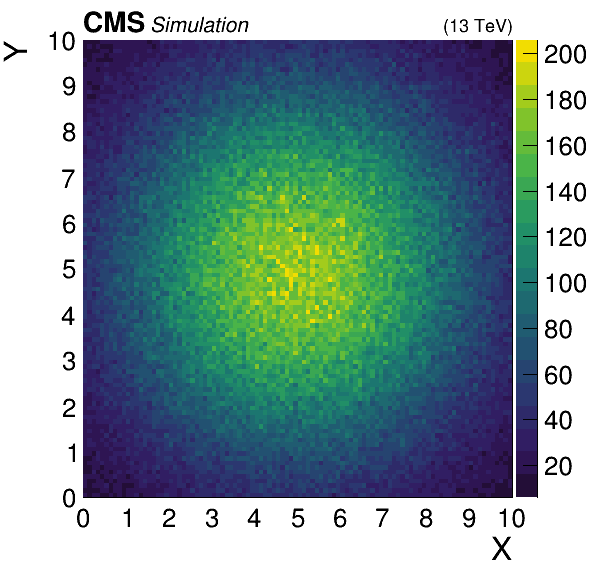

In [16]:
canv.Draw()

In [ ]:
CMS.SetExtraText("Simulation")

class Plotter:
    def __init__(self):
        self.outputPath = "./pdfs_palette"
        os.makedirs(self.outputPath, exist_ok=True)
        self.CreateHistograms()

    def CreateHistograms(self):
        self.bkgs = []
        f_gaus51 = ROOT.TF1("gaus51","gaus", 0, 10)
        f_gaus51.SetParameters(1, 5, 1)
        for i in range(0,6):
            h = ROOT.TH1F("bkg{}".format(i), "bkg{}".format(i), 100, 0, 10)
            h.FillRandom("gaus51", 16666)
            self.bkgs.append(h)

        f_gaus2 = ROOT.TF2("gaus2", "xygaus", 0, 5, 0, 5)
        f_gaus2.SetParameters(1, 2.5, 1, 2.5, 1)
        self.hist2d = ROOT.TH2F("hist2d", "2D Histogram", 25, 0, 5, 25, 0, 5)
        self.hist2d.FillRandom("gaus2", 200000)
        self.hist2d.Scale(10.0 / self.hist2d.Integral())

    def Plot(self, square, iPos):
        canv_name = f'example_{"square" if square else "rectangle"}_pos{iPos}'
        CMS.SetLumi("")
        CMS.SetEnergy("13")
        CMS.ResetAdditionalInfo()

        stack = ROOT.THStack("stack", "Stacked")

        canv = CMS.cmsCanvas(
            canv_name,
            0,
            10,
            1e-3,
            4300,
            "X",
            "",
            square=square,
            extraSpace=0.01,
            iPos=iPos,
        )
        leg = CMS.cmsLeg(0.81, 0.89 - 0.05 * 7, 0.99, 0.89, textSize=0.04)

        # Put samples together and draw them stacked
        hist_dict = {}
        names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]
        for n, hist in enumerate(self.bkgs):
            hist_dict[names[n]] =  hist
        CMS.cmsDrawStack(stack, leg, hist_dict)

        # Takes care of fixing overlay and closing object
        CMS.SaveCanvas(canv, os.path.join(self.outputPath, canv_name + ".pdf"))

    def Plot2D(self, square, iPos):
        canv_name = f'example_2D_{"square" if square else "rectangle"}_pos{iPos}'
        # Allow to reduce the size of the lumi info
        scaleLumi = 0.80 if square else None
        canv = CMS.cmsCanvas(
            canv_name,
            0,
            5,
            0,
            5,
            "X",
            "Y",
            square=square,
            extraSpace=0.01,
            iPos=iPos,
            with_z_axis=True,
            scaleLumi=scaleLumi,
        )

        self.hist2d.GetZaxis().SetTitle("Events normalised")
        self.hist2d.GetZaxis().SetTitleOffset(1.4 if square else 1.2)
        self.hist2d.Draw("same colz")
        
        # Set the CMS official palette
        CMS.SetCMSPalette()

        # Allow to adjust palette position
        CMS.UpdatePalettePosition(self.hist2d, canv)

        CMS.SaveCanvas(canv, os.path.join(self.outputPath, canv_name + ".pdf"))

plotter = Plotter()

In [ ]:
plotter.Plot(square=CMS.kSquare, iPos=0)

In [ ]:
plotter.Plot(square=CMS.kRectangular, iPos=0)

In [ ]:
plotter.Plot(square=CMS.kSquare, iPos=11)

In [ ]:
plotter.Plot(square=CMS.kRectangular, iPos=11)

In [ ]:
plotter.Plot2D(square=CMS.kSquare, iPos=0)

In [ ]:
plotter.Plot2D(square=CMS.kRectangular, iPos=0)

### Pythonic-world: `mplhep`
A set of helpers for matplotlib to more easily produce plots typically needed in HEP as well as style them in way that's compatible with current collaboration requirements (ROOT-like plots for CMS, ATLAS, LHCb, ALICE).

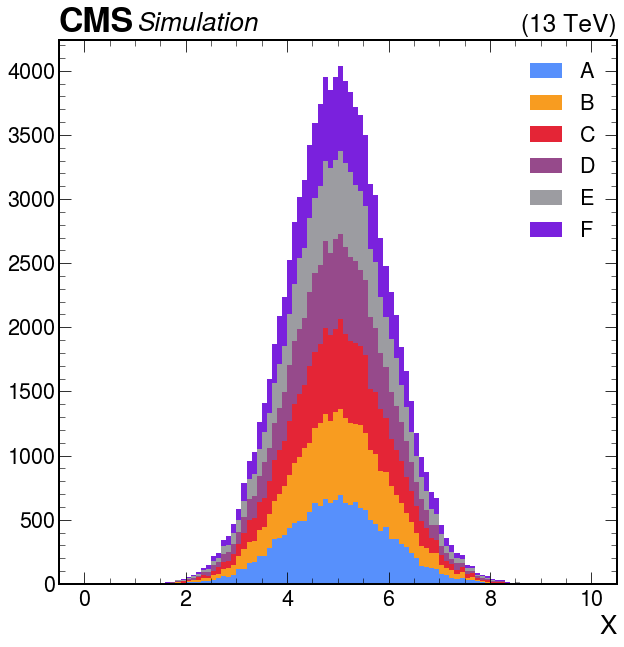

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import hist, uproot

 
h1d = hist.new.Reg(100, 0, 10, label="X").StrCat([], label="Sample", growth=True).Weight()\
        .fill(np.random.normal(5, 1, int(1e5)), np.random.choice(list("ABCDEF"), int(1e5)))

h2d = hist.new.Reg(100, 0, 10, label="X").Reg(100, 0, 10, label="Y").Weight()\
        .fill(np.random.normal(5, 3, int(1e6)), np.random.normal(5, 3, int(1e6)))
 
rf = uproot.recreate("test_file.root")
rf['h1d'] = h1d  # TH2 cat x regular axis
for sample in sorted(list(h1d.axes[1])):  # TH1 per cat
    rf[f'h1d_{sample}'] = h1d[:, sample]
rf['h2d'] = h2d  # Proper TH2
rf.close()
 
# Load CMS style including color-scheme
hep.style.use("CMS")
 
# Setup matplotlib figure
fig, ax = plt.subplots()
 
# Plot histograms
h1d.plot1d(ax=ax, stack=True, histtype='fill', sort='label');
 
# Style
plt.legend()
hep.cms.label();

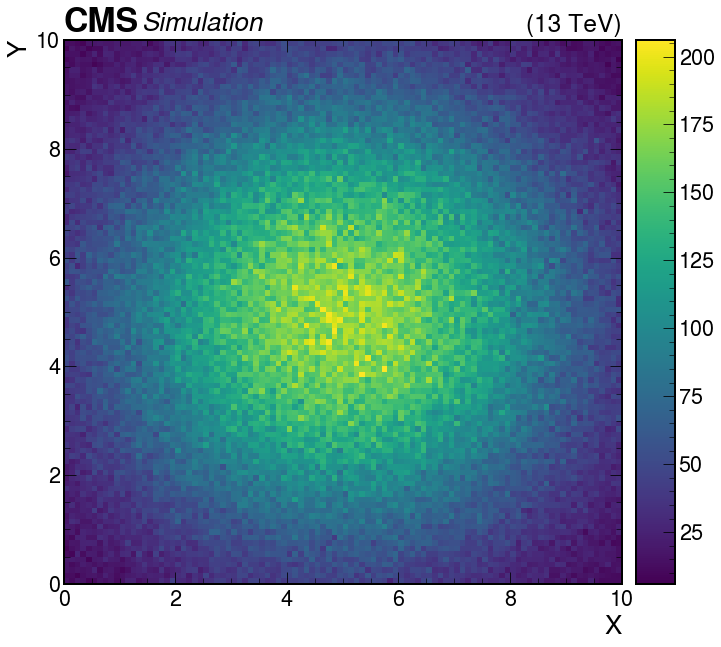

In [12]:
# Load CMS style including color-scheme (it's an editable dict)
plt.style.use(hep.style.CMS)

# Setup matplotlib figure
fig, ax = plt.subplots()

# Plot histogram
h2d.plot(ax=ax, cbarextend=True, flow='none');

# Style
hep.cms.label();